In [27]:
#============== NUMBA AND NUMPY ==============
import sys
import os
import numpy as np
from numpy import linalg as LA
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import matplotlib.gridspec as gridspec
import solver_qws as solver
from IPython.display import display
from tabulate import tabulate
q = 1.602176e-19 #C
kb = 1.3806504e-23 #J/K
nii = 0.0
hbar = 1.054588757e-34
m_e= 9.1093826E-31 #kg
pi=np.pi
eps0= 8.8541878176e-12 #F/m
J2meV=1e3/q


In [26]:
EgAlGaAs = lambda x,T: 1.155*x + 0.37*x**2 - 5.405E-4*T**2/(T+204)
EgAlGaAs(0.15,30)

#EgGaAs   = lambda T: 1.522 - ((5.8E-4*T**2)/(T+300))
EgGaAs   = lambda T: 1.53 - 5.0E-4 * T

EgGaAs(38)

1.5110000000000001

# Correct Biniding Energy

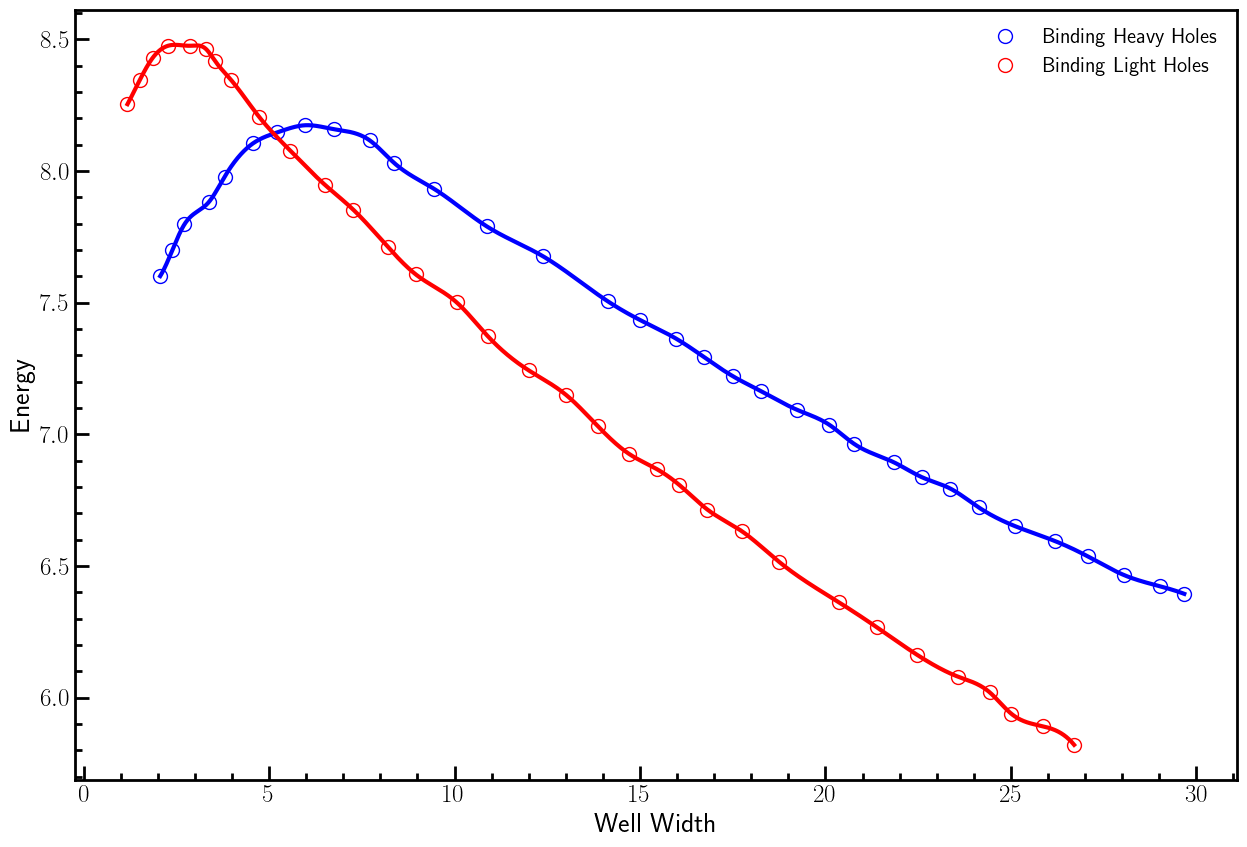

In [22]:
from scipy.interpolate import interp1d
import glob as gb

files = !ls ../cqws/binding/*.csv

bhh = np.genfromtxt(files[1],delimiter=',')
blh = np.genfromtxt(files[0],delimiter=',')

fhh= interp1d(bhh[:,0]/10, bhh[:,1],kind='cubic')
flh= interp1d(blh[:,0]/10, blh[:,1],kind='cubic')
ndat = round(((bhh[-1,0]/10)-(bhh[0,0]/10))/0.002) 
ndatlh = round(((blh[-1,0]/10)-(blh[0,0]/10))/0.002) 

xnew = np.linspace(bhh[0,0]/10,bhh[-1,0]/10,int(ndat))
xnewlh = np.linspace(blh[0,0]/10,blh[-1,0]/10,int(ndatlh))


fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(bhh[:,0]/10,bhh[:,1],'o',mfc='w',ms=10,lw=3,c='b',label='Binding Heavy Holes')
ax.plot(blh[:,0]/10,blh[:,1],'o',mfc='w',ms=10,lw=3,c='r',label='Binding Light Holes')
ax.plot(xnew,fhh(xnew),'-b',lw=3)
ax.plot(xnewlh,flh(xnewlh),'-r',lw=3)
ax.legend(fontsize=15)
ax.set_ylabel('Energy',fontsize=20)
ax.set_xlabel('Well Width',fontsize=20)
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.show()

In [23]:
print('Energy binding hh to well widht 23.74nm : %.1f'%fhh(23.74))
print('Energy binding lh to well widht 23.74nm : %.1f'%flh(23.74))
print('Energy binding hh to well widht 11.87nm : %.1f'%fhh(11.87))
print('Energy binding lh to well widht 11.87nm : %.1f'%flh(11.87))
print('Energy binding hh to well widht 13.85nm : %.1f'%fhh(13.85))
print('Energy binding lh to well widht 13.85nm : %.1f'%flh(13.85))
print('Energy binding hh to well widht 10.0nm : %.1f'%fhh(10.0))
print('Energy binding lh to well widht 10.0nm : %.1f'%flh(10.0))

Energy binding hh to well widht 23.74nm : 6.8
Energy binding lh to well widht 23.74nm : 6.1
Energy binding hh to well widht 11.87nm : 7.7
Energy binding lh to well widht 11.87nm : 7.3
Energy binding hh to well widht 13.85nm : 7.5
Energy binding lh to well widht 13.85nm : 7.0
Energy binding hh to well widht 10.0nm : 7.9
Energy binding lh to well widht 10.0nm : 7.5


# M4_3521 & M4_3522

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5323   |   HH1->-0.0046    |   LH1->-0.0095    |
|   E2-> 1.5412   |   HH2->-0.0055    |   LH2->-0.0164    |
|   E3-> 1.5837   |   HH3->-0.0183    |   LH3->-0.0428    |


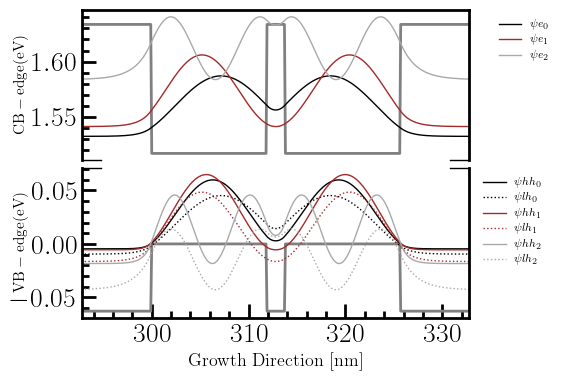

CPU times: user 2.27 s, sys: 2.21 s, total: 4.48 s
Wall time: 5.59 s


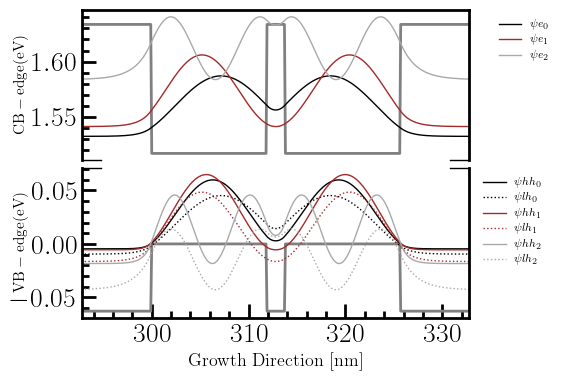

In [25]:
%%time
mev=1e-3


class Structure(object): pass
st = Structure() # this will be our datastucture
st.structure_name = 'test'
# TEMPERATURE
st.T = 30.0
# Binding Energy
st.HHBinding = fhh(11.87)*mev #meV
st.LHBinding = flh(11.87)*mev #meV

# st.ThHHBinding = 6.07e-3
# st.ThLHBinding = 6.76e-3
# st.naHHBinding = 7.25e-3
# st.naLHBinding = 7.71e-3



# Band Offset ratios
st.Qc = 0.65
st.Qv = 0.35

#s0.scheme = 0

# Total subband number to be calculated for electrons
st.subbands = 3
# APPLIED ELECTRIC FIELD
st.Fapp = 0e5 # (V/m)

# For 1D, z-axis is choosen
st.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |

st.material =[
             [300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

structure = st
nm = 1e-9
# RUN SIMULATION
model = solver.StructureFrom(structure) 
sol3 = solver.Solver(model).QuantumSolutions(absolute =True,Print=True)
solver.Solver(model).plotting(sol3,amp=10,eymin =-0.01,eymax=0.01,hymin=-0.05,hymax=0.12)
#TrArr3 = np.vstack((sol3.TEHH,sol3.TELH))
#np.savetxt(newpath+'/Tr-M4_3521.dat',TrArr3,delimiter=',')
#solver.Solver(model).print_result("M4_3521",sol3)

In [42]:
for e,hh,lh in zip(sol3.Ee,sol3.Ehh,sol3.Elh):
    print(round(e+hh-flh(13.85)*mev,4),round(e+lh-fhh(13.85)*mev,4))

1.5276 1.5324
1.537 1.5466


In [95]:
round(sol3.Ee[2]+sol3.Ehh[2]-fhh(23.74)*mev,4)

1.5461

In [7]:
# Energies = sol3.Energies
mev = 1e-3
bindingTQWhh = fhh(23.74)*mev
bindingTQWlh = flh(23.74)*mev
bindingnQWhh = fhh(11.87)*mev
bindingnQWlh = flh(11.87)*mev

hh1 = sol3.Ee[0]+sol3.Ehh[0] - bindingTQWhh
lh1 = sol3.Ee[0]+sol3.Elh[0] - bindingTQWlh
hh2 = sol3.Ee[1]+sol3.Ehh[1] - bindingnQWhh
lh2 = sol3.Ee[1]+sol3.Elh[1] - bindingnQWlh
hh3 = sol3.Ee[2]+sol3.Ehh[2] - bindingTQWhh
lh3 = sol3.Ee[2]+sol3.Elh[2] - bindingTQWlh

print(' hh1 : %.4f \n lh1 : %.4f \n hh2 : %.4f \n lh2 : %.4f \n hh3 : %.4f \n lh3 : %.4f \n' %(hh1,lh1,hh2,lh2,hh3,lh3))




 hh1 : 1.5190 
 lh1 : 1.5210 
 hh2 : 1.5330 
 lh2 : 1.5394 
 hh3 : 1.5460 
 lh3 : 1.5587 



In [96]:
print("Delta Ee: %.1f"%((sol3.Ee[1]-sol3.Ee[0])*1e3))
print("Delta EH: %.1f"%((sol3.Ehh[1]-sol3.Ehh[0])*1e3))
print("Delta EL: %.1f"%((sol3.Elh[1]-sol3.Elh[0])*1e3))
print("Delta E: %f"%((sol3.Elh[0]-sol3.Ehh[1])*1e3))


Delta Ee: 11.8
Delta EH: 3.4
Delta EL: 7.5
Delta E: -0.615951


In [67]:
from scipy.integrate import simps
integral = simps(sol3.Psie[:,0]*sol3.Psie[:,0].conjugate(),sol3.xaxis/1e-9)
#ejes = [min(sol3.xaxis),max(sol3.xaxis)/nm]
#print(integral)
#a = np.trapz(sol3.Psilh[:,0]*sol3.Psilh[:,0],ejes)

np.trapz(sol3.Psie[:,0]*sol3.Psie[:,0])

1.0000000000000007

## Export Data

In [71]:
 # Wave Function electron
#arrays to export

fxmin = -430
fxmax = +470
xmin = int(model.n_max/2+fxmin)
xmax = int(model.n_max/2 + fxmax)
amp  = 7
print ('To export data, xmin: %d, xmax:%d'%(sol3.xaxis[xmin]/nm,sol3.xaxis[xmax]/nm))
print('Data dimensions to export %d'%sol3.xaxis[xmin:xmax].shape)
Exp_Bands = np.zeros((sol3.xaxis[xmin:xmax].shape[0],3))
Exp_Psie  = np.zeros((sol3.Psie[xmin:xmax,0].shape[0],sol3.Psie.shape[1]+1))
Exp_Psihh = np.zeros((sol3.Psihh[xmin:xmax,0].shape[0],sol3.Psihh.shape[1]+1))
Exp_Psilh = np.zeros((sol3.Psilh[xmin:xmax,0].shape[0],sol3.Psilh.shape[1]+1))

Exp_Bands[:,0] = sol3.xaxis[xmin:xmax]/nm
Exp_Psie[:,0]  = sol3.xaxis[xmin:xmax]/nm
Exp_Psihh[:,0] = sol3.xaxis[xmin:xmax]/nm
Exp_Psilh[:,0] = sol3.xaxis[xmin:xmax]/nm

Exp_Bands[:,1] = sol3.CB[xmin:xmax]
Exp_Bands[:,2] = sol3.VB[xmin:xmax]

for i in range(1,model.subbands+1):
    Exp_Psie[:,i]  = amp*sol3.Psie[xmin:xmax,i-1]+sol3.Ee[i-1]
    Exp_Psihh[:,i] = amp*sol3.Psihh[xmin:xmax,i-1]-sol3.Ehh[i-1]
    Exp_Psilh[:,i] = amp*sol3.Psilh[xmin:xmax,i-1]-sol3.Elh[i-1]
    
np.savetxt(newpath+'/Bands-M4_3521.txt',Exp_Bands,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/Psi-Electrons-M4_3521.txt',Exp_Psie,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-HeavyHoles-M4_3521.txt',Exp_Psihh,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-LightHoles-M4_3521.txt',Exp_Psilh,delimiter=',',fmt="%s")


Exp_Psie.shape

To export data, xmin: 275, xmax:365
Data dimensions to export 900


(900, 3)

## CQWS with different Well width ($W_{1}$)

In [10]:
datap = []
datae = []
cbs   = []
xa    = []
Delta1 =  []
Delta2 = []
wwidth = []
nm = 1e-9
for i in range(16):
    class Structure(object): pass
    s = Structure() # this will be our datastucture
    # TEMPERATURE
    s.T = 30 #Kelvin

    # Binding Energy
    s.HHBinding =9e-3 #meV
    s.LHBinding =9e-3 #meV

    # Band Offset ratios
    s.Qc = 0.65
    s.Qv = 0.35

#s0.scheme = 0

    # Total subband number to be calculated for electrons
    s.subbands = 2
    # APPLIED ELECTRIC FIELD
    s.Fapp = 0e5 # (V/m)

    # For 1D, z-axis is choosen
    s.gridfactor = 0.1#nm

    s.material =[
                 [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
                 [ i+11.87,   'GaAs'  ,      0,   0, 'n','Well'],
                 [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
                 [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
                 [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],        
                ]
    stucture = s
    model = solver.StructureFrom(stucture) #
    sol   = solver.Solver(model).QuantumSolutions(absolute =True,Print=False)
   
    datap.append((sol.Psie))    
    datae.append((sol.Ee)) 
    cbs.append((sol.CB)) 
    xa.append((sol.xaxis/nm))
    Delta1.append((sol.Elh[0]-sol.Ehh[0]))
    Delta2.append((sol.Elh[1]-sol.Ehh[1]))
    wwidth.append((i+11.87))









Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5
Total layer number: 5


# M4_3523

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5340   |   HH1->-0.0046    |   LH1->-0.0096    |
|   E2-> 1.5428   |   HH2->-0.0055    |   LH2->-0.0165    |


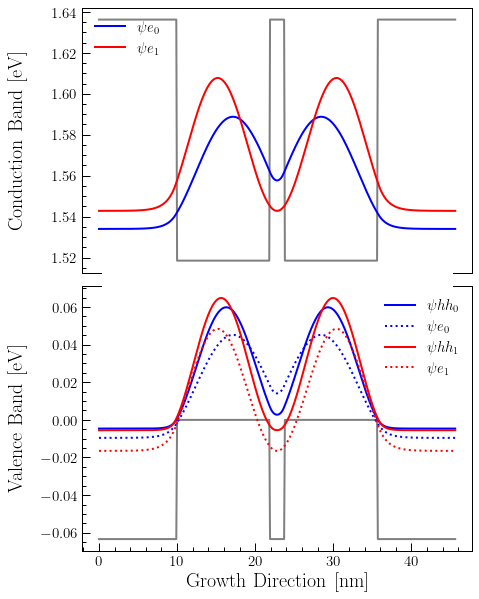

CPU times: user 935 ms, sys: 269 ms, total: 1.2 s
Wall time: 731 ms


In [52]:
%%time
class Structure(object): pass
s4 = Structure() # this will be our datastucture
# TEMPERATURE
s4.T = 14#Kelvin
# Binding Energy
s4.HHBinding = fhh(11.87)*mev #meV
s4.LHBinding = flh(11.87)*mev#meV

# Band Offset ratios
s4.Qc = 0.65
s4.Qv = 0.35



# Total subband number to be calculated for electrons
s4.subbands = 2
# APPLIED ELECTRIC FIELD
s4.Fapp = 0e5 # (V/m)  ----> KV/cm

# For 1D, z-axis is choosen
s4.gridfactor = 0.10#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s4.material =[
             [ 10.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 10.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 20.0,   'GaAs',      0,   0, 'n','Substate']
             ]




stucture4 = s4



nm = 1e-9

# RUN SIMULATION
model4 = solver.StructureFrom(stucture4) #
#sol4 = solver.Schrodinger(model4,sparse = True,absolute =False)
sol4 = solver.Solver(model4).QuantumSolutions(absolute = True,Print=True)
#TrArr4 = np.vstack((sol4.TEHH,sol4.TELH))
#np.savetxt(newpath+'/Tr-M4_3523.dat',TrArr4,delimiter=',')
solver.Solver(model4).plotting(sol4,amp=10,axmin=25,axmax=25,eymin =-0.085,eymax=0.03,hymin=-0.02,hymax=0.15)
#solver.Solver(model4).print_result("M4_3523",sol4)

In [7]:
# Energies = sol3.Energies
mev = 1e-3
bindingTQWhh = fhh(11.87)*mev
bindingTQWlh = flh(11.87)*mev
bindingnQWhh = fhh(11.87)*mev
bindingnQWlh = flh(11.87)*mev

hh1 = sol4.Ee[0]+sol4.Ehh[0] - bindingTQWhh
lh1 = sol4.Ee[0]+sol4.Elh[0] - bindingTQWlh
hh2 = sol4.Ee[1]+sol4.Ehh[1] - bindingnQWhh
lh2 = sol4.Ee[1]+sol4.Elh[1] - bindingnQWlh
hh3 = sol4.Ee[2]+sol4.Ehh[2] - bindingTQWhh
lh3 = sol4.Ee[2]+sol4.Elh[2] - bindingTQWlh

print(' hh1 : %.4f \n lh1 : %.4f \n hh2 : %.4f \n lh2 : %.4f \n hh3 : %.4f \n lh3 : %.4f \n' %(hh1,lh1,hh2,lh2,hh3,lh3))



 hh1 : 1.5297 
 lh1 : 1.5341 
 hh2 : 1.5394 
 lh2 : 1.5499 
 hh3 : 1.5948 
 lh3 : 1.6188 



In [75]:
 # Wave Function electron
#arrays to export

fxmin = -750
fxmax = +750
xmin = int(model4.n_max/2+fxmin)
xmax = int(model4.n_max/2 + fxmax)
amp  = 7
print ('To export data, xmin: %d, xmax:%d'%(sol4.xaxis[xmin]/nm,sol4.xaxis[xmax]/nm))
print('Data dimensions to export %d'%sol4.xaxis[xmin:xmax].shape)
Exp_Bands4 = np.zeros((sol4.xaxis[xmin:xmax].shape[0],3))
Exp_Psie4  = np.zeros((sol4.Psie[xmin:xmax,0].shape[0],sol4.Psie.shape[1]+1))
Exp_Psihh4 = np.zeros((sol4.Psihh[xmin:xmax,0].shape[0],sol4.Psihh.shape[1]+1))
Exp_Psilh4 = np.zeros((sol4.Psilh[xmin:xmax,0].shape[0],sol4.Psilh.shape[1]+1))

Exp_Bands4[:,0] = sol4.xaxis[xmin:xmax]/nm
Exp_Psie4[:,0]  = sol4.xaxis[xmin:xmax]/nm
Exp_Psihh4[:,0] = sol4.xaxis[xmin:xmax]/nm
Exp_Psilh4[:,0] = sol4.xaxis[xmin:xmax]/nm

Exp_Bands4[:,1] = sol4.CB[xmin:xmax]
Exp_Bands4[:,2] = sol4.VB[xmin:xmax]

for i in range(1,model4.subbands+1):
    Exp_Psie4[:,i]  = amp*sol4.Psie[xmin:xmax,i-1]+sol4.Ee[i-1]
    Exp_Psihh4[:,i] = amp*sol4.Psihh[xmin:xmax,i-1]-sol4.Ehh[i-1]
    Exp_Psilh4[:,i] = amp*sol4.Psilh[xmin:xmax,i-1]-sol4.Elh[i-1]
    
np.savetxt(newpath+'/Bands-M4_3523.txt',Exp_Bands4,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/Psi-Electrons-M4_3523.txt',Exp_Psie4,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-HeavyHoles-M4_3523.txt',Exp_Psihh4,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-LightHoles-M4_3523.txt',Exp_Psilh4,delimiter=',',fmt="%s")



To export data, xmin: 237, xmax:387
Data dimensions to export 1500


In [58]:
print('Ecperimental H1: %.4f'%1.532778)
print('Ecperimental L1: %.4f'%1.53798)

Ecperimental H1: 1.5328
Ecperimental L1: 1.5380


# Calculate $\Delta E $ 

In [93]:
print("Delta E: %.f"%((sol4.Ehh[0]-sol3.Elh[0])*1e3))
print("Delta E: %f"%((sol3.Ehh[0]-sol3.Elh[0])*1e3))


Delta E: -7
Delta E: -2.774437


In [ ]:
print("Delta Ee: %.1f"%((sol4.Ee[1]-sol4.Ee[0])*1e3))
print("Delta EH: %.1f"%((sol4.Ehh[1]-sol4.Ehh[0])*1e3))
print("Delta EL: %.1f"%((sol4.Elh[1]-sol4.Elh[0])*1e3))

print("Delta E: %f"%((sol4.Elh[1]-sol4.Ehh[2])*1e3))


# FIRST SAMPLES M4_3171, M4_3172 & M3_3226

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5326   |   HH1->-0.0040    |   LH1->-0.0101    |
|   E2-> 1.5377   |   HH2->-0.0051    |   LH2->-0.0139    |


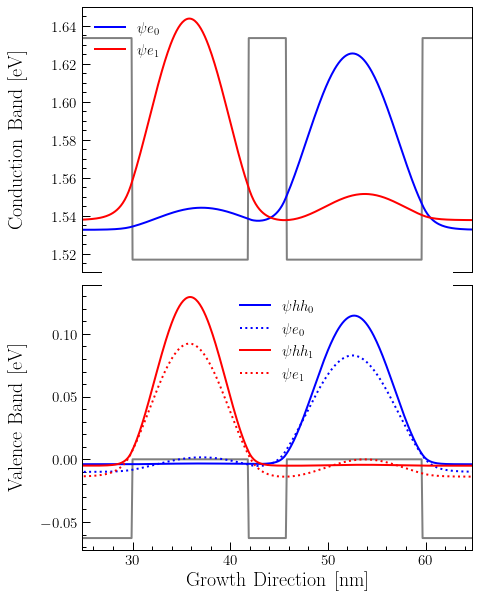

CPU times: user 1.77 s, sys: 112 ms, total: 1.88 s
Wall time: 2.07 s


In [26]:
%%time
mev=1e-3


class Structure(object): pass
st = Structure() # this will be our datastucture

# TEMPERATURE
st.T = 30.0#Kelvin

# Binding Energy
st.HHBinding =fhh(13.85)*mev #meV
st.LHBinding =flh(13.85)*mev #meV

# Band Offset ratios
st.Qc = 0.65
st.Qv = 0.35
#s0.scheme = 0
# Total subband number to be calculated for electrons
st.subbands = 2
# APPLIED ELECTRIC FIELD
st.Fapp = 0e5 # (V/m)

# For 1D, z-axis is choosen
st.gridfactor = 0.1#nm


st.material =[
             [ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 3.96, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]


structure = st




nm = 1e-9

# RUN SIMULATION
model = solver.StructureFrom(structure) #
sol = solver.Solver(model).QuantumSolutions(absolute =True,Print=True)
solver.Solver(model).plotting(sol,amp=10)
#TrArr3 = np.vstack((sol3.TEHH,sol3.TELH))
#np.savetxt(newpath+'/Tr-M4_3521.dat',TrArr3,delimiter=',')


In [7]:
1.5270-1.5382-0.0046

-0.0158000000000001

fhh(11.87)

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5305   |   HH1->-0.0038    |   LH1->-0.0085    |
|   E2-> 1.5389   |   HH2->-0.0051    |   LH2->-0.0148    |
|   E3-> 1.5755   |   HH3->-0.0152    |   LH3->-0.0379    |


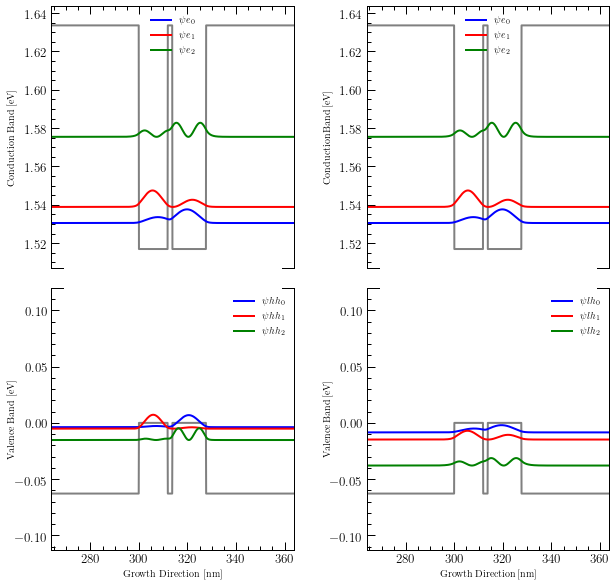

CPU times: user 5.48 s, sys: 1.06 s, total: 6.55 s
Wall time: 2.45 s


In [13]:
%%time



class Structure(object): pass
s5 = Structure() # this will be our datastucture

# TEMPERATURE
s5.T = 30 #Kelvin

# Binding Energy
s5.HHBinding =fhh(13.85)*mev
s5.LHBinding =flh(13.85)*mev #meV

# Band Offset ratios
s5.Qc = 0.65
s5.Qv = 0.35

#s0.scheme = 0



# Total subband number to be calculated for electrons
s5.subbands = 3
# APPLIED ELECTRIC FIELD
s5.Fapp = 0e5 # (V/m)

# For 1D, z-axis is choosen
s5.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s5.material =[
        
             [ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 13.85,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

# s2.material =[
#              [ 10 ,'GaAs'  ,      0,   0, 'n','Well'],
#              [ 300, 'AlGaAs',   0.15,   0, 'n','Barrier']
#               ]






stucture5 = s5



nm = 1e-9

# RUN SIMULATION
model5 = solver.StructureFrom(stucture5) #

sol5 = solver.Solver(model5).QuantumSolutions(absolute =True,Print=True)
solver.Solver(model5).plotting(sol5,amp=1,eymin =-0.01,eymax=0.01,hymin=-0.05,hymax=0.12)

TrArr5 = np.vstack((sol5.TEHH,sol5.TELH))
np.savetxt(newpath+'/Tr-M4_3140.dat',TrArr5,delimiter=',')
solver.Solver(model5).print_result("M4_3140",sol5)

In [15]:
# Energies = sol3.Energies
mev = 1e-3
bindingTQWhh = fhh(13.85)*mev
bindingTQWlh = flh(13.85)*mev
bindingnQWhh = fhh(11.87)*mev
bindingnQWlh = flh(11.87)*mev

hh1 = sol5.Ee[0]+sol5.Ehh[0] - bindingTQWhh
lh1 = sol5.Ee[0]+sol5.Elh[0] - bindingTQWlh
hh2 = sol5.Ee[1]+sol5.Ehh[1] - bindingnQWhh
lh2 = sol5.Ee[1]+sol5.Elh[1] - bindingnQWlh
hh3 = sol5.Ee[2]+sol5.Ehh[2] - bindingTQWhh
lh3 = sol5.Ee[2]+sol5.Elh[2] - bindingTQWlh

print(' hh1 : %.4f \n lh1 : %.4f \n hh2 : %.4f \n lh2 : %.4f \n hh3 : %.4f \n lh3 : %.4f \n' %(hh1,lh1,hh2,lh2,hh3,lh3))



 hh1 : 1.5273 
 lh1 : 1.5314 
 hh2 : 1.5368 
 lh2 : 1.5460 
 hh3 : 1.5837 
 lh3 : 1.6058 



In [94]:
mev = 1e-3
bindingTQWhh = fhh(13.85)*mev
bindingTQWlh = flh(13.85)*mev
bindingnQWhh = fhh(11.87)*mev
bindingnQWlh = flh(11.87)*mev

E1Trhh = sol5.Ee[0]+sol5.Ehh[0] - bindingTQWhh
E1Trlh = sol5.Ee[0]+sol5.Elh[0] - bindingTQWlh
E2Trhh = sol5.Ee[1]+sol5.Ehh[1] - bindingnQWhh
E2Trlh = sol5.Ee[1]+sol5.Elh[1] - bindingnQWlh
#E3Trhh = sol5.Ee[2]+sol5.Ehh[2] - bindingTQWhh
#E3Trlh = sol5.Ee[2]+sol5.Elh[2] - bindingTQWlh

Trans =np.zeros((model5.subbands,2))
Trans[0,0] = E1Trhh
Trans[0,1] = E1Trlh
Trans[1,0] = E2Trhh
Trans[1,1] = E2Trlh
#Trans[2,0] = E3Trhh
#Trans[2,1] = E3Trlh
Trans
print('Experimental H1 %.4f'%1.526549)
print('Experimental L1 %.4f'%1.529649)

for i in range(Trans.shape[0]):
    for j in range(Trans.shape[1]):
            print(r'T %d: %.4f'%(j,Trans[i,j]))

Experimental H1 1.5265
Experimental L1 1.5296
T 0: 1.5276
T 1: 1.5319
T 0: 1.5369
T 1: 1.5461


In [38]:
print("Delta E: %.1f"%((sol5.Ee[1]-sol5.Ee[0])*1e3))
print("Delta E: %.1f"%((sol5.Ehh[1]-sol5.Ehh[0])*1e3))
print("Delta E: %.1f"%((sol5.Elh[0]-sol5.Ehh[1])*1e3))

Delta E: 8.4
Delta E: 1.3
Delta E: 3.3


In [73]:
 # Wave Function electron
#arrays to export

fxmin = -430
fxmax = +470
xmin = int(model5.n_max/2+fxmin)
xmax = int(model5.n_max/2 + fxmax)
amp  = 7
print ('To export data, xmin: %d, xmax:%d'%(sol5.xaxis[xmin]/nm,sol5.xaxis[xmax]/nm))
print('Data dimensions to export %d'%sol5.xaxis[xmin:xmax].shape)
Exp_Bands = np.zeros((sol5.xaxis[xmin:xmax].shape[0],3))
Exp_Psie  = np.zeros((sol5.Psie[xmin:xmax,0].shape[0],sol5.Psie.shape[1]+1))
Exp_Psihh = np.zeros((sol5.Psihh[xmin:xmax,0].shape[0],sol5.Psihh.shape[1]+1))
Exp_Psilh = np.zeros((sol5.Psilh[xmin:xmax,0].shape[0],sol5.Psilh.shape[1]+1))

Exp_Bands[:,0] = sol5.xaxis[xmin:xmax]/nm
Exp_Psie[:,0]  = sol5.xaxis[xmin:xmax]/nm
Exp_Psihh[:,0] = sol5.xaxis[xmin:xmax]/nm
Exp_Psilh[:,0] = sol5.xaxis[xmin:xmax]/nm

Exp_Bands[:,1] = sol5.CB[xmin:xmax]
Exp_Bands[:,2] = sol5.VB[xmin:xmax]

for i in range(1,model5.subbands+1):
    Exp_Psie[:,i]  = amp*sol5.Psie[xmin:xmax,i-1]+sol5.Ee[i-1]
    Exp_Psihh[:,i] = amp*sol5.Psihh[xmin:xmax,i-1]-sol5.Ehh[i-1]
    Exp_Psilh[:,i] = amp*sol5.Psilh[xmin:xmax,i-1]-sol5.Elh[i-1]
    
np.savetxt(newpath+'/Bands-M4_3140.txt',Exp_Bands,delimiter=',',fmt="%s")   
np.savetxt(newpath+'/Psi-Electrons-M4_3140.txt',Exp_Psie,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-HeavyHoles-M4_3140.txt',Exp_Psihh,delimiter=',',fmt="%s")
np.savetxt(newpath+'/Psi-LightHoles-M4_3140.txt',Exp_Psilh,delimiter=',',fmt="%s")


Exp_Psie.shape

To export data, xmin: 270, xmax:360
Data dimensions to export 900


(900, 3)

N. of total data: 877 
X minima: 270
X maxima: 357


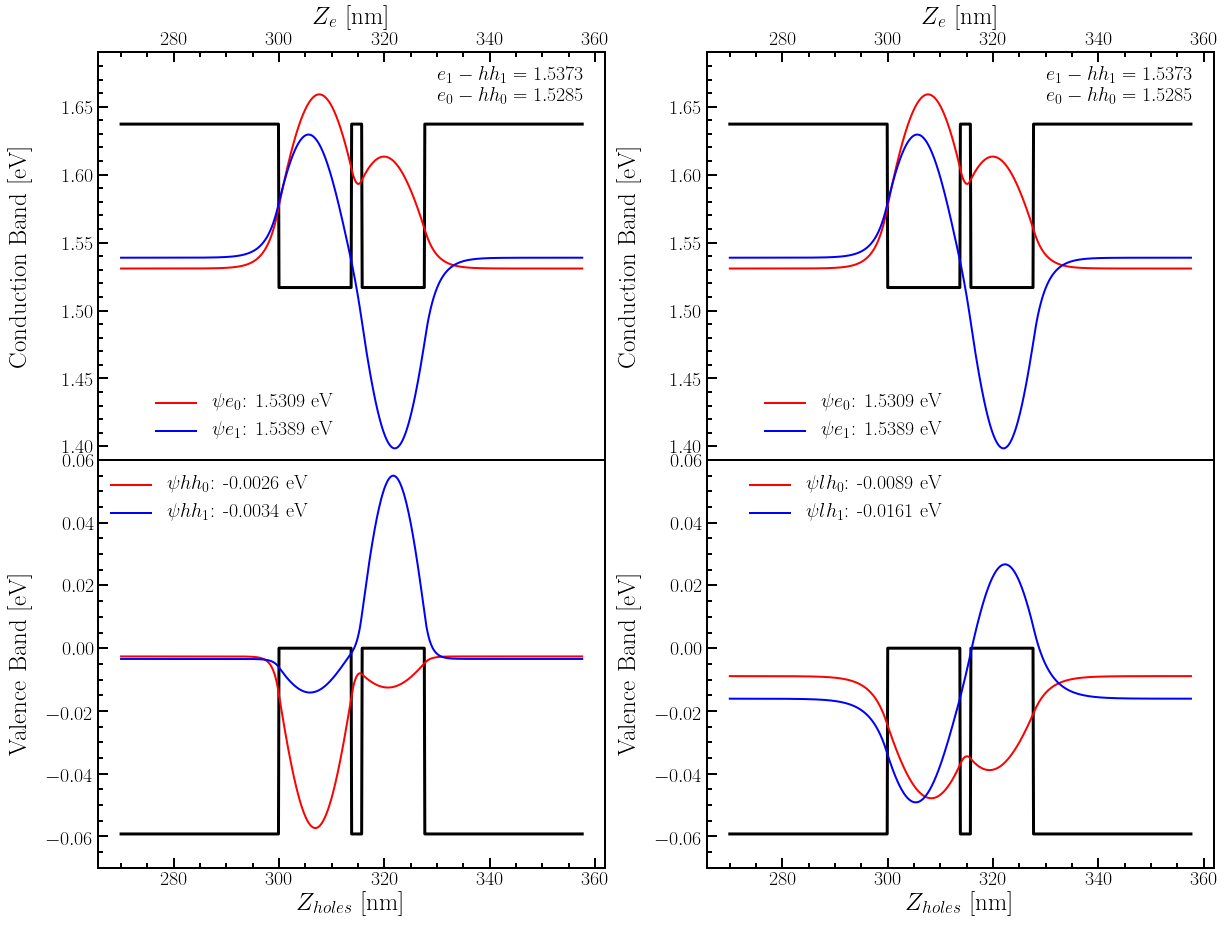

In [128]:
xmin  = 2700
xmax  = model5.n_max-2700
xminv = sol5.xaxis[xmin]/nm
xmaxv = sol5.xaxis[xmax]/nm
ymin  = min(sol5.CB)
ymax  = max(sol5.CB)
print('N. of total data: %d '%(xmax-xmin))
print('X minima: %d'%(sol5.xaxis[xmin]/nm))
print('X maxima: %d'%(sol5.xaxis[xmax]/nm))
amp  = 1.5
amp2 = 0.5
lcolor = ['r','b']
#fig0,ax0= plt.subplots(2,1,figsize=(15,15),sharex=True, sharey=False,gridspec_kw={'hspace': 0})
gs = gridspec.GridSpec(2, 2,height_ratios=[1, 1])
plt.figure(figsize=(20,15))
ax1 = plt.subplot(gs[0, 0]) # row 0, col 0
ax1.plot(sol5.xaxis[xmin:xmax]/nm,sol5.CB[xmin:xmax],'-k',lw=3)
for i in range(model5.subbands):
    ax1.plot(sol5.xaxis[xmin:xmax]/nm,amp*sol5.Psie[i,xmin:xmax]+sol5.Ee[i],
             lw    = 2,
             color = lcolor[i],
             label = '$\psi e_%d$: %.4f eV'%(i,sol5.Ee[i]))
ax1.legend(loc = 1,bbox_to_anchor=(0.5,0.2),fontsize=20)
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel(r'$Z_{e}$ [nm]',fontsize=25)
ax1.set_ylabel('Conduction Band [eV]',fontsize=25)
ax1.yaxis.set_label_coords(-0.13,0.5)
ax1.set_ylim([1.39,1.69])
#ax0[0].set_xlim([250,400])


for j in range(TrArr5.shape[1]):
     ax1.text(xminv+60,ymax+((j+1)*15e-3),r'$e_%d-hh_%d = %.4f$'%(j,j,TrArr5[0,j]),size=20)
            
        
# Heavy Holes
ax2 = plt.subplot(gs[1, 0],sharex=ax1) # row 1, col 0
ax2.plot(sol5.xaxis[xmin:xmax]/nm,sol5.VB[xmin:xmax],'-k',lw=3)
for i in range(model5.subbands):
    ax2.plot(sol5.xaxis[xmin:xmax]/nm,amp2*sol5.Psihh[i,xmin:xmax]-sol5.Ehh[i],
             lw    = 2,
             color = lcolor[i],
             label = '$\psi hh_%d$: %.4f eV'%(i,-sol5.Ehh[i]))
ax2.legend(loc = 1,bbox_to_anchor=(0.45,1),fontsize=20)
ax2.set_xlabel(r'$Z_{holes}$ [nm]',fontsize=25)
ax2.set_ylabel('Valence Band [eV]',fontsize=25)
ax2.set_ylim([-0.07,0.06])
ax2.yaxis.set_label_coords(-0.13,0.5)



ax3= plt.subplot(gs[0, 1]) # row 0, col 1
ax3.plot(sol5.xaxis[xmin:xmax]/nm,sol5.CB[xmin:xmax],'-k',lw=3)
for i in range(model5.subbands):
    ax3.plot(sol5.xaxis[xmin:xmax]/nm,amp*sol5.Psie[i,xmin:xmax]+sol5.Ee[i],
             lw    = 2,
             color = lcolor[i],
             label = '$\psi e_%d$: %.4f eV'%(i,sol5.Ee[i]))
ax3.legend(loc = 1,bbox_to_anchor=(0.5,0.2),fontsize=20)
ax3.xaxis.set_ticks_position('top')
ax3.xaxis.set_label_position('top')
ax3.set_xlabel(r'$Z_{e}$ [nm]',fontsize=25)
ax3.set_ylabel('Conduction Band [eV]',fontsize=25)
ax3.yaxis.set_label_coords(-0.13,0.5)
ax3.set_ylim([1.39,1.69])
ax3.yaxis.set_label_coords(-0.13,0.5)

# Transitions labels . 
for j in range(TrArr5.shape[1]):
     ax3.text(xminv+60,ymax+((j+1)*15e-3),r'$e_%d-hh_%d = %.4f$'%(j,j,TrArr5[0,j]),size=20)
            
            
# Light Holes
ax4 = plt.subplot(gs[1, 1],sharex=ax3) # row 1, col 0
ax4.plot(sol5.xaxis[xmin:xmax]/nm,sol5.VB[xmin:xmax],'-k',lw=3)
for i in range(model5.subbands):
    ax4.plot(sol5.xaxis[xmin:xmax]/nm,amp2*sol5.Psilh[i,xmin:xmax]-sol5.Elh[i],
             lw    = 2,
             color = lcolor[i],
             label = '$\psi lh_%d$: %.4f eV'%(i,-sol5.Elh[i]))
    
ax4.legend(loc = 1,bbox_to_anchor=(0.5,1),fontsize=20)
ax4.set_xlabel(r'$Z_{holes}$ [nm]',fontsize=25)
ax4.set_ylabel('Valence Band [eV]',fontsize=25) 
ax4.set_ylim([-0.07,0.06])
ax4.yaxis.set_label_coords(-0.13,0.5)
         

plt.subplots_adjust(hspace=.0)
#plt.savefig('CQWs-M4_3523.pdf',bbox_inches='tight')

plt.show()


# CQWS under Electrifield

Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5447   |    HH1->0.0031    |    LH1->0.0032    |
|   E2-> 1.5557   |   HH2->-0.0050    |   LH2->-0.0062    |


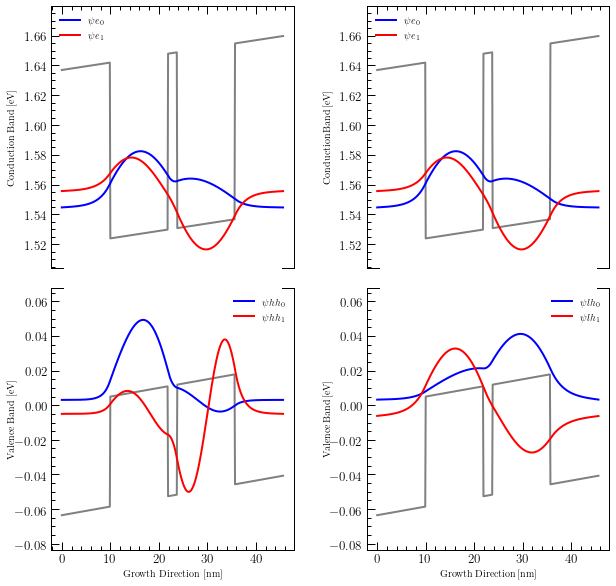

CPU times: user 3.91 s, sys: 234 ms, total: 4.14 s
Wall time: 2.03 s


In [87]:
%%time



class Structure(object): pass
s4 = Structure() # this will be our datastucture

# TEMPERATURE
s4.T = 4 #Kelvin
# Binding Energy
# Binding Energy
s4.HHBinding = fhh(11.87)*mev #meV
s4.LHBinding = flh(11.87)*mev #meV
# Band Offset ratios
s4.Qc = 0.65
s4.Qv = 0.35



# Total subband number to be calculated for electrons
s4.subbands = 2
# APPLIED ELECTRIC FIELD
s4.Fapp = 5e5 # (V/m)

# For 1D, z-axis is choosen
s4.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s4.material =[
             [ 10.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 1.92, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 10.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 30.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             #[ 20.0,   'GaAs',      0,   0, 'n','Substate']
             ]

# s2.material =[
#              [ 10 ,'GaAs'  ,      0,   0, 'n','Well'],
#              [ 300, 'AlGaAs',   0.15,   0, 'n','Barrier']
#               ]






stucture4 = s4



nm = 1e-9

# RUN SIMULATION
model4 = solver.StructureFrom(stucture4) #

#sol4 = solver.Schrodinger(model4,sparse = True,absolute =False)
sol4 = solver.Solver(model4).QuantumSolutions(absolute = False,Print=True)
TrArr4 = np.vstack((sol4.TEHH,sol4.TELH))
np.savetxt(newpath+'/Tr-M4_3523.dat',TrArr4,delimiter=',')
solver.Solver(model4).plotting(sol4,amp=0.4,axmin=25,axmax=25,eymin =-0.02,eymax=0.02,hymin=-0.02,hymax=0.05)
#solver.Solver(model4).print_result("M4_",sol4)

In [55]:
from IPython.display import Image,display
from IPython.core.display import HTML
display(Image(url= "https://journals.aps.org/prb/article/10.1103/PhysRevB.85.045207/figures/2/medium",width=500, unconfined=True))
